# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

MY REPOSITORY LINK:

https://github.com/ccaswell25/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [2]:
# Import the pandas package
import pandas as pd 

#Read in the data:
raw_eqk = pd.read_csv('data/earthquake_data.csv')


#Let's take a peak at the data with a quick 5 row snapshot:
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [8]:
#a Let's see the shape of our dataframe:
raw_eqk.shape
#We can see there are 120,108 rows and 8 columns

#b Let's get the type of our dataframe's shape:
print(type(raw_eqk.shape))
#It is a tuple!

#c Print only the number of rows by accessing raw_eqk's shape
print("number of rows : ", raw_eqk.shape[0])

#There are 120108 rows

<class 'tuple'>
number of rows :  120108


## 3

Get the unique values of the type of events.

In [9]:
# Let's get the unique values of the type of events: 
raw_eqk.type.unique()

#We can see there are many types of events. 11 when counted.

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [13]:
#a Let's only get the earthquake events and store them as a new variable
eqk = raw_eqk.type

#b Update the index of eqk to be the id column of the dataframe: 
eqk.set_index('id')

#c Check the new index by viewing the first 3 rows of eqk
eqk.head(n = 3)

AttributeError: 'Series' object has no attribute 'set_index'

In [13]:
#a Let's only get the earthquake events and store them as a new variable
eqk = raw_eqk.type

#b Update the index of eqk to be the id column of the dataframe: 
eqk.set_index('id')

#c Check the new index by viewing the first 3 rows of eqk
eqk.head(n = 3)

AttributeError: 'Series' object has no attribute 'set_index'

# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [5]:
# solve exercise here

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Distribution of Earthquake Magnitudes'}, ylabel='Frequency'>

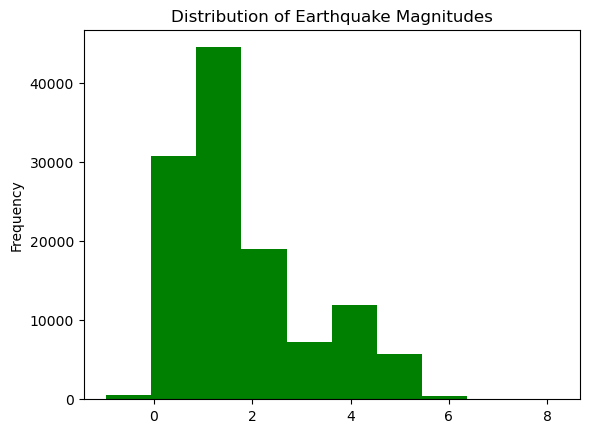

In [24]:
# Below is a histogram of the earthquake magnitudes:
raw_eqk.mag.plot(kind = 'hist',
       title = 'Distribution of Earthquake Magnitudes',
       xlabel = 'Magnitude',
       ylabel = 'Frequency',
       color = 'green')

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Top 20 Earthquakes and their Magnitude'}, xlabel='Earthquake', ylabel='Magnitude'>

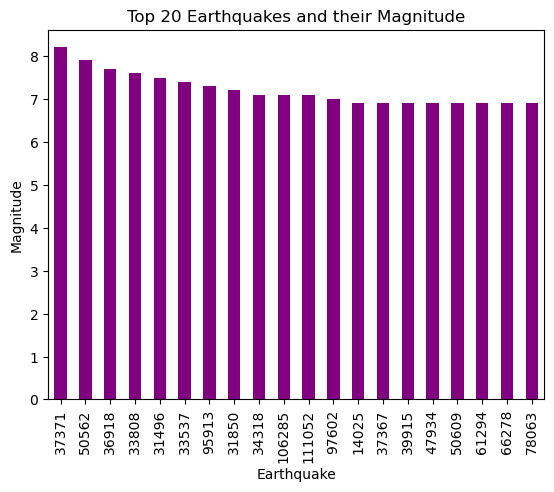

In [20]:
#a First, we create a new variable 'top20'to get the 20 earthquakes with the largest magnitude:
top20 = raw_eqk.mag.nlargest(20)
top20
#I checked it out to verify we only have 20 in our new data subset

#b A Bar Plot of this data:
top20.plot(kind = 'bar',
          title = 'Top 20 Earthquakes and their Magnitude',
          xlabel = 'Earthquake',
          ylabel = 'Magnitude',
          color = 'purple')


c. The role of the top20 index in the graph is the associated row numbers.


# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [22]:
# Using the index of top20 below:
raw_eqk.loc[top20.index]

,time,latitude,longitude,depth,mag,id,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,usc000nzvd,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,usc000rki5,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,usc000p27i,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,usc000phx5,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,usb000pr89,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,usc000piqj,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,usb000slwn,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,usb000pq41,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,usc000pft9,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,usc000sxh8,"154km NW of Kota Ternate, Indonesia",earthquake


# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


In [9]:
# solve exercise here